
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



I will be working on "No show appointment dataset". This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This dataset contains fourteen (14 features(columns)) that characterizes a patient (Patientid-a number to identify a patient, AppointmentID- the number to identify the appointment, Gender- represents the sex of the patient, ScheduledDay- represents the day and time the patient scheduled his/her appointment, AppointmentDay- describes the day and time of apointment, Age- tells the age of a patient, Neighborhood- tells the place of the appointment, Scholarship- describes if the patient is enrolled in the Brasilian welfare program "Bolsa Família", Hipertension- this tells if the patient has hipertension or not, Diabetes- describes if the patient suffers from diabetes or not, Alcoholism- describes if a patient takes alcohol or not, handicap- tells if the patient is an handicapped or not, SMS_recieved- tells the number of sms a patient received regarding the appointment, No-show- tells if the patient show up or does not show up for the appointment.
### Question(s) for Analysis
>1.Which gender show up for appointment the most?

>2.Which age range show up the most for appointment?

>3.Does having scholarship influence the number of patients that show up for appointment ?

>4.What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>5.Which gender showed up most for appointment with or without scholarship?

>6.Do patients without diabetes and hipertension show up for appointment??


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_med = pd.read_csv('KaggleV2-May-2016.csv')
df_med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_med.shape


(110527, 14)

In [5]:
df_med.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df_med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df_med.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Data Cleaning


In [9]:
#From the description of the dataframe, we noticed an age of -1, which is not possible. We locate the row that has the age value -1.
df_med[df_med['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df_med.drop(99832, axis =0, inplace =True)

In [11]:
df_med[df_med['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
#Here we rename the columns 
df_med.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df_med.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> In the following columns, we check the unique values in the numeric columns and no_show column

In [13]:
df_med.scholarship.unique()

array([0, 1], dtype=int64)

In [14]:
df_med.hipertension.unique()

array([1, 0], dtype=int64)

In [15]:
df_med.diabetes.unique()

array([0, 1], dtype=int64)

In [16]:
df_med.alcoholism.unique()

array([0, 1], dtype=int64)

In [17]:
df_med.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [18]:
df_med.sms_received.unique()

array([0, 1], dtype=int64)

In [19]:
df_med.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# We swap the handcap and sms_received column names based on the column description in kaggle
df_med.rename(columns= {'handcap':'sms_received', 'sms_received':'handcap'}, inplace =True)

In [21]:
df_med.sms_received.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [22]:
#Changing the datatype of the scheduleday and appointment day from object to datetime
df_med['scheduledday'] = pd.to_datetime(df_med['scheduledday'])
df_med['appointmentday'] = pd.to_datetime(df_med['appointmentday'])
df_med

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [23]:
#Check for null values in the dataframe
df_med.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
sms_received      0
handcap           0
no_show           0
dtype: int64

In [24]:
#check for the number of number of duplicated rows
df_med.duplicated().sum()

0

In [25]:
df_med.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




### Below are the histogram description of the data captured in the numerical columns

In [26]:
df_med.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'sms_received', 'handcap', 'no_show'],
      dtype='object')

In [27]:
def plothist(column, x_label, y_label, diagram_title):
    column.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(diagram_title)
    plt.show()

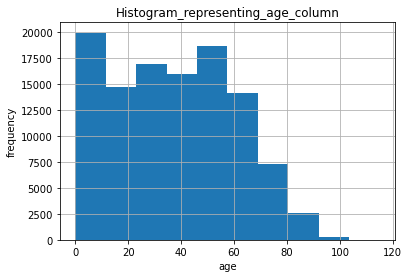

In [28]:
plothist(df_med.age, 'age', 'frequency', 'Histogram_representing_age_column')

>The age column has more population of patients between the ages 0 and 70 compared to ages from 70 and above

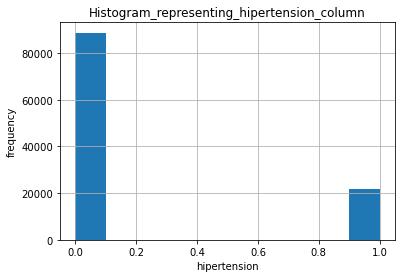

In [29]:
plothist(df_med.hipertension, 'hipertension', 'frequency', 'Histogram_representing_hipertension_column')

> A large number of patients are not sufferring from hipertension

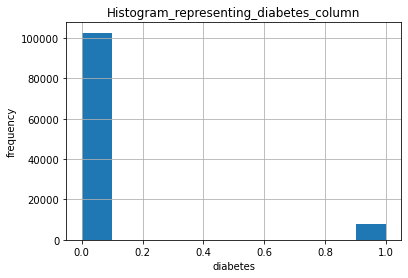

In [30]:
plothist(df_med.diabetes, 'diabetes', 'frequency', 'Histogram_representing_diabetes_column')

> A large number of patients are not sufferring from diabetes

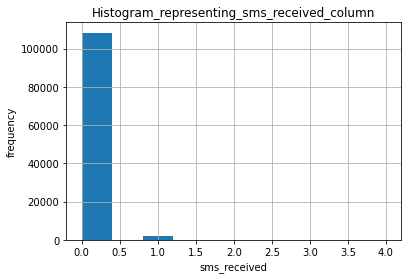

In [31]:
plothist(df_med.sms_received, 'sms_received', 'frequency', 'Histogram_representing_sms_received_column')

In [32]:
df_med['sms_received'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: sms_received, dtype: int64

> The column name 'handicap' and 'sms_received' was swapped based on the data description in Kaggle. 0,or 1, or 2, or 3, or 4 sms was set to a patient but a patient can either be handcap or not with value of either 0 or 1. This histogram above shows most patient did not receive sms.

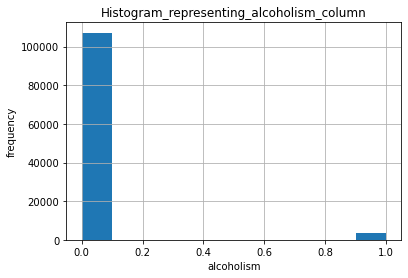

In [33]:
plothist(df_med.alcoholism, 'alcoholism', 'frequency', 'Histogram_representing_alcoholism_column')

> From the histogram, most patient are not alcoholic

In [34]:
df_med['handcap'].value_counts()

0    75044
1    35482
Name: handcap, dtype: int64

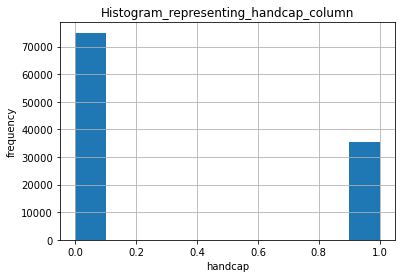

In [35]:
plothist(df_med.handcap, 'handcap', 'frequency', 'Histogram_representing_handcap_column')

>Here we have 35,482 patients that are handicapped and 75,044 patients that are not handicapped

In [36]:
df_med['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

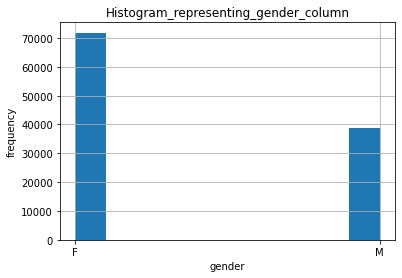

In [37]:
plothist(df_med.gender, 'gender', 'frequency', 'Histogram_representing_gender_column')

>The histogram shows that the data contains more Female patient than Male patient.

## Here I grouped the age column into four (4) categories

In [38]:
# Check the minimum and maximum value in the age column
df_med['age'].min(), df_med['age'].max()

(0, 115)

In [39]:
#Grouped age using pandas.cut
bin_edges = [0, 20, 40, 70, 115]
bin_names = ['child', 'youth', 'adult', 'old']
df_med['age'] = pd.cut(df_med['age'], bin_edges, labels=bin_names)
df_med.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,adult,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,child,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,old,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,youth,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,youth,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,youth,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,child,CONQUISTA,0,0,0,0,0,0,No


In [40]:
df_med['age'].value_counts()

adult    41270
youth    28835
child    28309
old       8573
Name: age, dtype: int64

>Here I plotted bar chart below based on the value count of age described in the cell above 

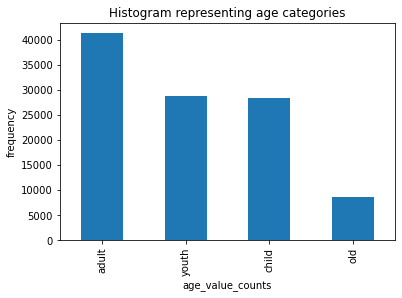

In [41]:
df_med['age'].value_counts().plot(kind='bar')
plt.xlabel('age_value_counts')
plt.ylabel('frequency')
plt.title('Histogram representing age categories')
plt.show();

> The histogram tells that the age captured high population of ages between 40 and 70. We could tell that number of patient between ages 0 and 70 (child, youth and adult) is higher compared to the number of patients who are 70 and above (old)

## Which gender show up for appointment the most ?

>Comparing one variable with the output variable column 

In [42]:
def plothist1(column1, column2, x_label, y_label, diagram_title):
    med_column = df_med.groupby(column1)[column2].value_counts()
    med_column.plot(kind='bar')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(diagram_title)
    plt.show();
# df_med.groupby('no_show').gender.value_counts().plot(kind='bar')

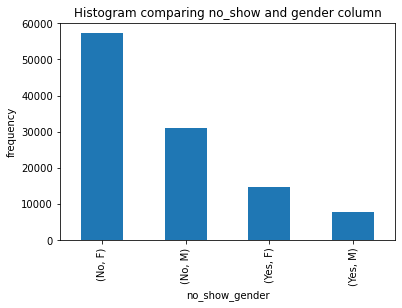

In [43]:
plothist1('no_show', 'gender', 'no_show_gender', 'frequency', 'Histogram comparing no_show and gender column')

> The histogram shows how each gender showed up or did not show up for appointment.  More female patients showed up for appointment compared to the male patients.This is possibly because the data captures more female patient's data.

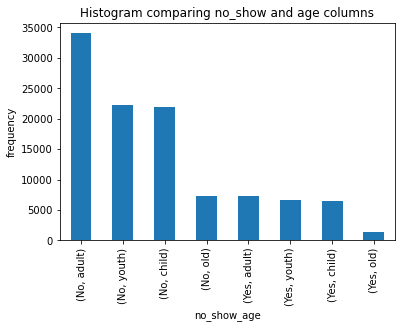

In [44]:
plothist1('no_show', 'age', 'no_show_age', 'frequency', 'Histogram comparing no_show and age columns')

>The categories of adult, youth and child showed up for appointment the most compared to the old category

## Does having scholarship influence the number of patients that show up for appointment ?

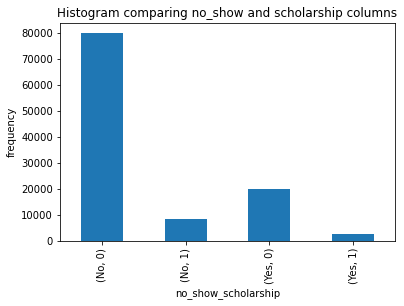

In [45]:
plothist1('no_show', 'scholarship', 'no_show_scholarship', 'frequency', 'Histogram comparing no_show and scholarship columns')

>More patient with no scholarship showed up for their appointment. From the bar chart, having scholarship does not influence the number of patients that show up for appointment. 

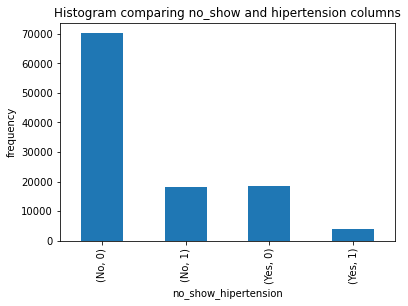

In [46]:
plothist1('no_show', 'hipertension', 'no_show_hipertension', 'frequency', 'Histogram comparing no_show and hipertension columns')

>There is just a little difference between patients who did not show up and had hypertension compared to the patient who show up and does not have hipertension. We can't tell if one with hypertension will show up baesd on the histogram.

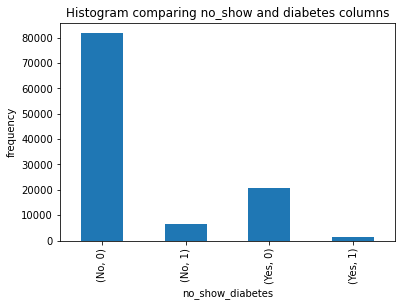

In [47]:
plothist1('no_show', 'diabetes', 'no_show_diabetes', 'frequency', 'Histogram comparing no_show and diabetes columns')

>Patients with no diabetes showed up more for appointment compared to those with diabetes.

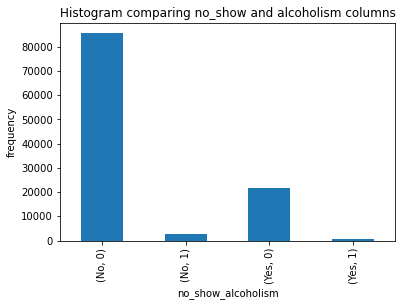

In [48]:
plothist1('no_show', 'alcoholism', 'no_show_alcoholism', 'frequency', 'Histogram comparing no_show and alcoholism columns')

> A large number of patient who are not alcoholic showed up for appointment compared to the alcoholic ones

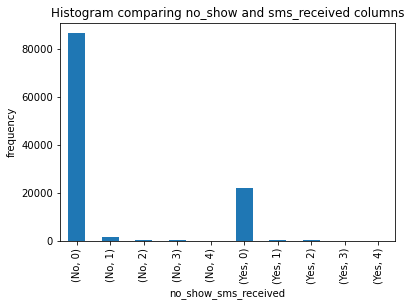

In [49]:
plothist1('no_show', 'sms_received', 'no_show_sms_received', 'frequency', 'Histogram comparing no_show and sms_received columns')

> Quite a number of patient showed up for appointment without receiving sms

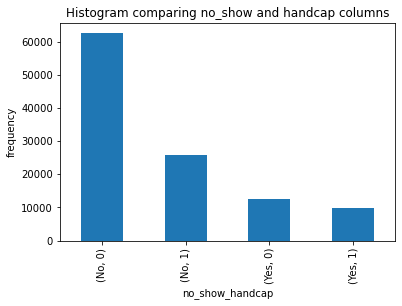

In [50]:
plothist1('no_show', 'handcap', 'no_show_handcap', 'frequency', 'Histogram comparing no_show and handcap columns')

>The frequency of handcap patient who show up for appointment is just a bit lower than patient who are not handcap and did not show up for appointment.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>I will plot an heatmap to show the correlation between the features of the data with numerical columns. I also mapped the object in gender column and no_show column to 1 and 0

In [51]:
#Drop the patientid and appointmentid columns
df_mednew = df_med.drop(columns=['patientid', 'appointmentid'], axis=1)
df_mednew.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,adult,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,child,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,1,0,0,0,No


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>I will plot an heatmap to show the correlation between the features of the data with numerical columns. I also mapped the object in gender column and no_show column to 1 and 0 below

In [52]:
df_mednew.no_show = df_mednew.no_show.map(dict(Yes=1, No=0))
df_mednew.gender = df_mednew.gender.map(dict(F=1, M=0))
df_mednew.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,adult,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,child,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,adult,JARDIM DA PENHA,0,1,1,0,0,0,0


<AxesSubplot:>

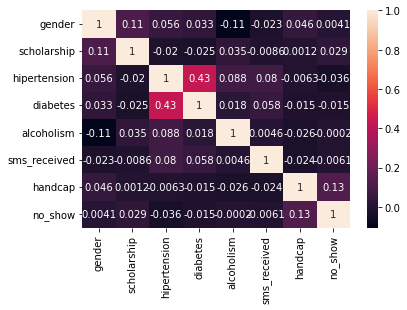

In [53]:
corr = df_mednew.corr()
sns.heatmap(corr, annot=True)

>From the heatmap above, none of the feature(characteristics) of patients has a high correlation with the no_show column. 

### Which gender showed up for appointment with or without scholarship?

>I have decided to use the first dataframe df_med for easy visualization

In [54]:
df_med.groupby(['no_show', 'scholarship']).gender.value_counts()

no_show  scholarship  gender
No       0            F         50498
                      M         29426
         1            F          6747
                      M          1536
Yes      0            F         12488
                      M          7253
         1            F          2106
                      M           472
Name: gender, dtype: int64

In [55]:
def plothist2(column1, column2, column3, x_label, y_label, diagram_title):
    group_column = df_med.groupby([column1, column2])[column3].value_counts()
    group_column.plot(kind='bar')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(diagram_title)
    plt.show();

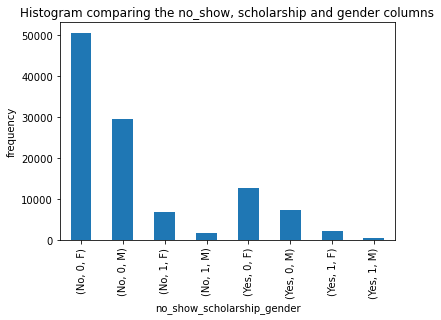

In [56]:
 plothist2('no_show', 'scholarship', 'gender', 'no_show_scholarship_gender', 'frequency', 'Histogram comparing the no_show, scholarship and gender columns')

>Female patients with no scholarship showed up for appointment more than the male patient with or with no scholarship

>Below I also compared alcoholism and age column to the no_show column

In [57]:
df_med.groupby(['no_show', 'alcoholism']).age.value_counts()

no_show  alcoholism  age  
No       0           adult    32016
                     child    21832
                     youth    21677
                     old       7099
         1           adult     2015
                     youth      532
                     old        116
                     child       20
Yes      0           adult     6799
                     child     6442
                     youth     6428
                     old       1334
         1           adult      440
                     youth      198
                     old         24
                     child       15
Name: age, dtype: int64

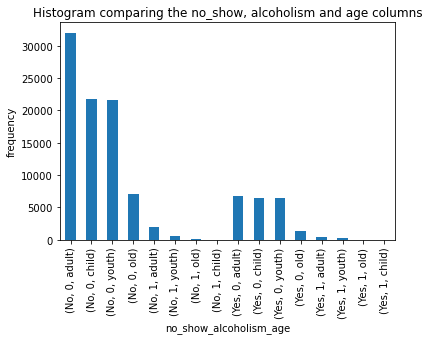

In [58]:
 plothist2('no_show', 'alcoholism', 'age', 'no_show_alcoholism_age', 'frequency', 'Histogram comparing the no_show, alcoholism and age columns')

>The patients who showed up more are non alcoholic and they fall in the child, youth and adult category

## Do patients without diabetes and hipertension show up for appointment?

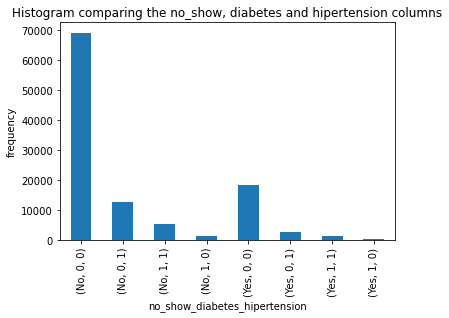

In [59]:
plothist2('no_show', 'diabetes', 'hipertension', 'no_show_diabetes_hipertension', 'frequency', 'Histogram comparing the no_show, diabetes and hipertension columns')

>patients who are neither hipentensive nor diabetic showed up more compared to those who are either hipertension or diabetic or are hipertension and diabetic.

<a id='conclusions'></a>
## Conclusions

>After plotting heatmap which captures the correlation of the numerical columns, none of the colums was highly correlated apart from the diagonal. None of the columns highly correlates to the no_show column. I was not able to predict the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment.
I plotted some bar charts comparing the numerical columns to the output column (no_show) and explained the outcome.
I also compared three columns to find out the relationship between them.. 

>Limitations include:
The data analysis was limited to only the data of 100k patients that was given. The data does not address kind of medical appointment the patient show up or does not show up for (is the appointment for minor checkup or for major check).

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

### References
https://www.codegrepper.com/code-examples/python/map+function+to+encode+categorical+variables
https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe